In [82]:
import pandas as pd
import matplotlib.pyplot as plt


#Meteostat

In [83]:
meteostat_df = pd.read_csv("../resources/meteostat_tempratures.csv")
meteostat_df['time'] = pd.to_datetime(meteostat_df['time'])

meteostat_df.set_index('time', inplace=True)

In [84]:
meteostat_df.head()

,temp
time,
2011-02-01 00:00:00,-1.4
2011-02-01 01:00:00,-0.6
2011-02-01 02:00:00,-0.7
2011-02-01 03:00:00,-0.6
2011-02-01 04:00:00,0.0


<Axes: title={'center': 'Hourly'}, xlabel='time'>

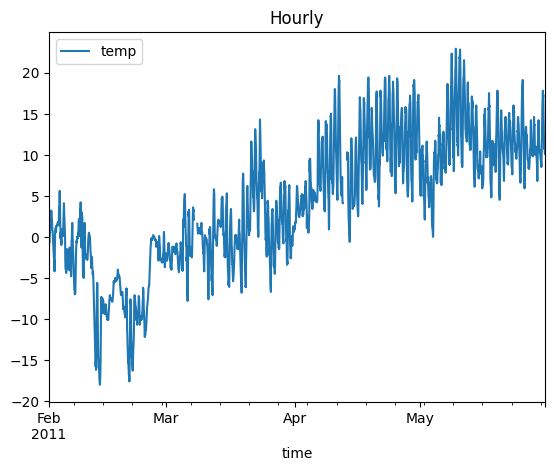

In [85]:
meteostat_df.plot(title="Hourly")

<Axes: title={'center': 'Daily'}, xlabel='time'>

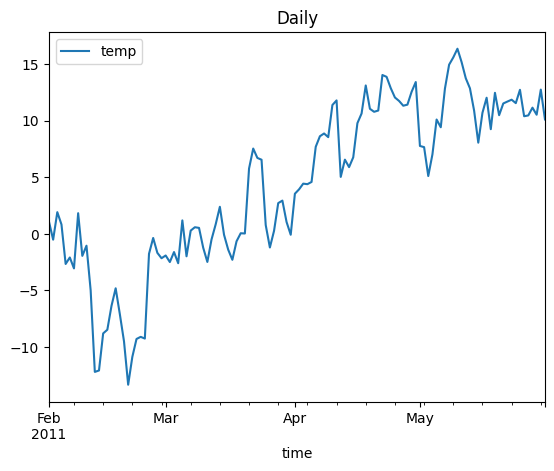

In [86]:
daily_meteostat = meteostat_df.resample('D').mean()
daily_meteostat.plot(title="Daily")

<Axes: title={'center': 'Weekly'}, xlabel='time'>

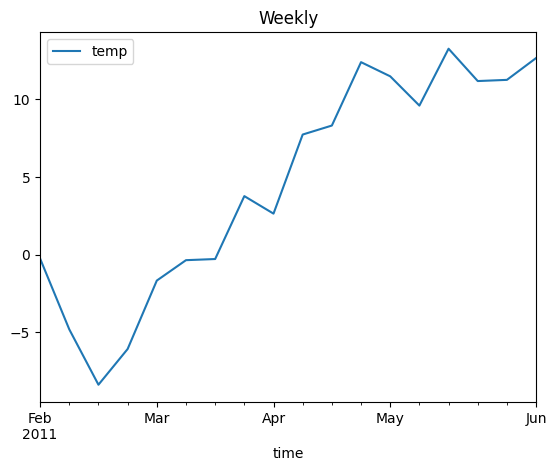

In [87]:
weekly_meteostat = meteostat_df.resample('W').mean()
weekly_meteostat.plot(title="Weekly")

LST Modis

In [88]:
lst_modis = pd.read_csv("../resources/LST_MODIS_interpolated.csv")
lst_modis.head()

,2-1,267.8085176349908,269.24098572493585
0,2-2,265.142249,269.465910
1,2-3,266.676563,270.521495
2,2-4,264.916696,270.140224
3,2-5,267.890411,266.233942
4,2-6,264.887623,267.248561


In [89]:
converted_modis = pd.DataFrame(columns=['time','temp_night','temp_day','avg'])

In [90]:
converted_modis['time'] = daily_meteostat.index

In [91]:
day = [269.24098572493585,]
night = [267.8085176349908]
daybday = lst_modis['269.24098572493585']
nightbnight = lst_modis['267.8085176349908']

for x in daybday:
    day.append(x)
for y in nightbnight:
    night.append(y)

In [92]:
new_day = []
new_night = []
for x in day:
    new_day.append(x- 273.15)

for x in night:
    new_night.append(x-273.15)

In [93]:
avg = []
for x in range(len(new_day)):
    avg.append((new_day[x]+new_night[x])/2)

In [94]:
converted_modis['temp_night'] = new_night
converted_modis['temp_day'] = new_day
converted_modis['avg'] = avg

In [95]:
converted_modis.head()

,time,temp_night,temp_day,avg
0,2011-02-01,-5.341482,-3.909014,-4.625248
1,2011-02-02,-8.007751,-3.684090,-5.845920
2,2011-02-03,-6.473437,-2.628505,-4.550971
3,2011-02-04,-8.233304,-3.009776,-5.621540
4,2011-02-05,-5.259589,-6.916058,-6.087823


In [97]:
converted_modis.set_index('time', inplace=True)

<Axes: xlabel='time'>

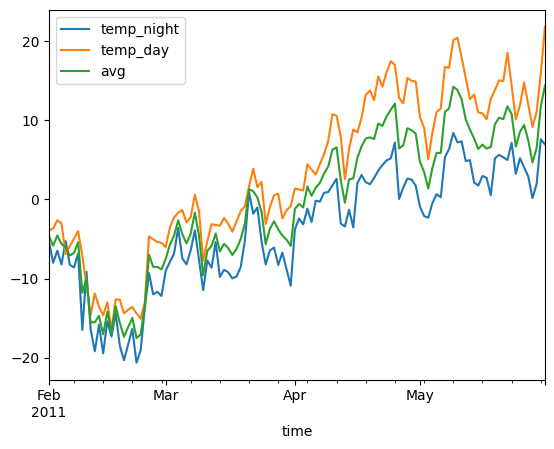

In [98]:
converted_modis.plot()